Image augmentation
===

How we present the images and various randomly transformed versions to the network in training mode in order to increase the dataset and improve performance.

## A random rock revisited

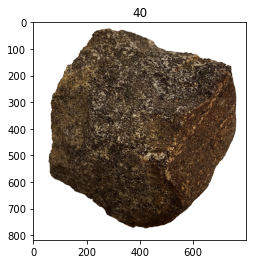

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from glob import glob
from torchvision import transforms

rock_images_glob = "120 Rock Images/*.png"
rock_images = glob(rock_images_glob)
rock_images.sort() # get them in the right order
input_size = 224

np.random.seed(2)

rock_id = np.random.choice(len(rock_images)) # 33
img = Image.open(rock_images[rock_id])
plt.imshow(img)
plt.title(rock_id);

In [1255]:
# this happens to each image in training mode
complete_transform = transforms.Compose([
        transforms.RandomResizedCrop(input_size, scale=(.75, 1), ratio=(.33, 2.5)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomAffine(degrees=360, translate=(0.2, 0.2), shear=(-16, 16, -16, 16), scale=(0.75, 1.2)),
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

#to_tensor = transforms.ToTensor()
#normalize = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

### Random resize crop

* Crops helpful at all? Our images are generally complete and we lose information (e.g. Shape)

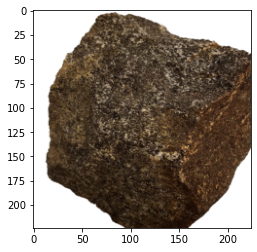

In [1254]:
random_resize_crop = transforms.RandomResizedCrop(input_size, scale=(.75, 1), ratio=(.33, 2.5))

plt.imshow(random_resize_crop(img))

### RandomAffine: Shear

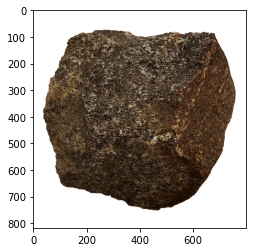

In [1104]:
shear = transforms.RandomAffine(degrees=0, shear=(-16, 16, -16, 16))
plt.imshow(shear(img))

### RandomAffine: Translate

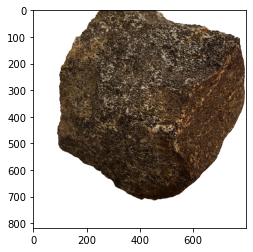

In [1142]:
shear = transforms.RandomAffine(degrees=0, translate=(0.2, 0.2))
plt.imshow(shear(img))

### RandomAffine: Scale

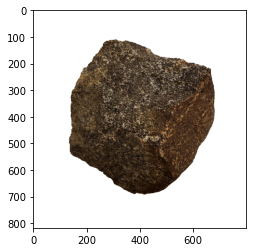

In [1215]:
shear = transforms.RandomAffine(degrees=0, scale=(0.75, 1.2))
plt.imshow(shear(img))

### Complete transformation

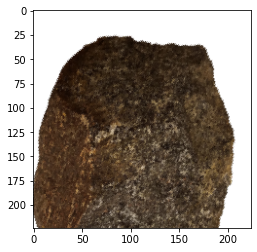

In [1296]:
plt.imshow(complete_transform(img))